## Prueba #0601

### "Análisis de clasificación con PNL"

#### Responda las siguientes preguntas proporcionando código Python:
#### Objectivos:
- Preprocesamiento de datos de texto.
- Crear una representación TF IDF.
- Realizar el análisis predictivo mediante el algoritmo Naive Bayes.

In [1]:
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')               # Desactivar las advertencias

#### Leer los datos:
Datos de reseñas de películas del departamento de CS de Cornell. <br>
- Los datos se pueden encontrar [aquí](https://www.cs.cornell.edu/people/pabo/movie-review-data). <br>
- Descarga y descomprimir el "conjunto de datos polarity". <br>
- Bajo la carpeta "txt_sentoken", hay subcarpetas "pos" y "neg". <br>

In [2]:
# Especifique la carpeta y lea las subcarpetas.
reviews = load_files('txt_sentoken/')
my_docs, y = reviews.data, reviews.target

In [3]:
len(my_docs)

2002

In [4]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1001, 1001], dtype=int64))

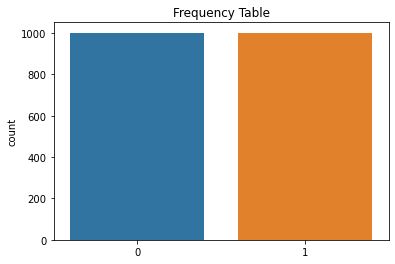

In [5]:
# Visualizar la variable de respuesta.
sns.countplot(y).set_title("Frequency Table")
plt.show()

1). Realizar el preprocesamiento de los datos:

In [6]:
corpus = []
for i in range(0, len(my_docs)):
    review = re.sub(r'\W', ' ', str(my_docs[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^b\s+', '', review)
    review = re.sub(r'\s+', ' ', review)               # Eliminar los espacios en blanco sobrantes incluidos en los pasos anteriores.
    corpus.append(review)  

2). Crear una representación TF IDF.

In [22]:
TFIDF = TfidfVectorizer(max_features = 1000, min_df = 2, max_df = 0.6, stop_words = stopwords.words('english'))
TFIDF.fit(corpus)                                          # Crear el modelo TF IDF. 
X = TFIDF.transform(corpus)
X.shape

(2002, 1000)

3). Aplicar el algoritmo de Naive Bayes algorithm. Calcular la exactitud.

In [23]:
classifier = GaussianNB();
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size = 0.25)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.7644710578842315
